In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/sequence.txt", sep="\t")
df

,id,seq,Unnamed: 2,Unnamed: 3
0,NR_118751.1 Alitibacter langaaensis strain ATC...,partial sequence,ATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCT...,NaN
1,NR_042885.1 Alitibacter langaaensis strain CCU...,partial sequence,ATTGAACGCTGGCGGCAGGCTTAACACATGCAAGTCGAACGGTAAC...,NaN
2,NR_200035.1 Roseovarius maritimus strain S4756...,complete sequence,CAACTTGAGAGTTTGATCCTGGCTCAGAACGAACGCTGGCGGCAGG...,NaN
3,NR_200034.1 Roseovarius roseus strain S1116L3 ...,complete sequence,CAACTTGAGAGTTTGATCCTGGCTCAGAACGAACGCTGGCGGCAGG...,NaN
4,NR_200033.1 Planosporangium spinosum strain 12...,complete sequence,TTGTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTG...,NaN
...,...,...,...,...
27727,NR_025100.1 Thermoclostridium stercorarium sub...,partial sequence,TGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAACACATGCA...,NaN
27728,NR_026347.1 Clostridium isatidis strain WV6 16...,partial sequence,GGCGTGCNTAACACATGCAAGTCGAGCGAGGTGATTTCNTTCGGGA...,NaN
27729,NR_026295.1 Couchioplanes caeruleus subsp. azu...,partial sequence,CGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGAAAGGCCCCT...,NaN
27730,NR_025773.1 Halomonas koreensis 16S ribosomal RNA,partial sequence,ACGATGGGAGCTTGCTCCCAGGCGTCGAGCGGCGGACGGGTGAGTA...,NaN


(26491, 4)
(7483, 8)


/tmp/ipykernel_22149/560820387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_seq"] = df["Unnamed: 2"].apply(len)


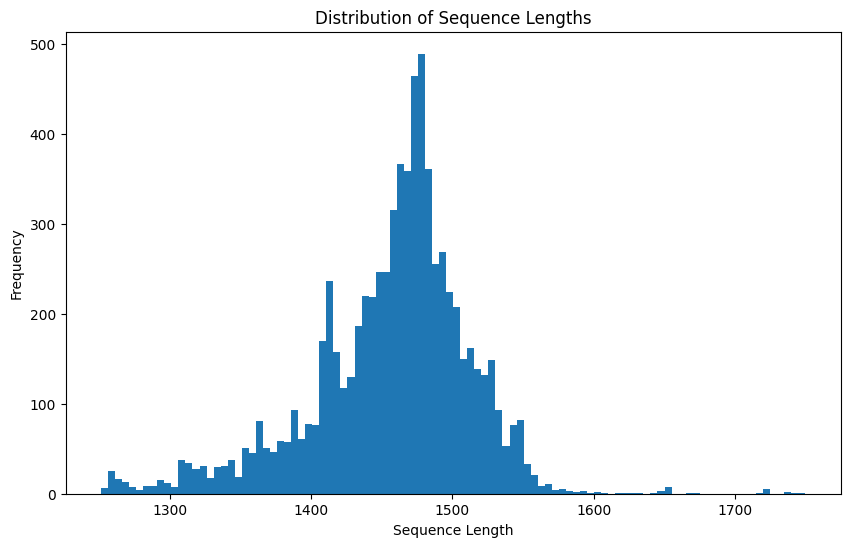

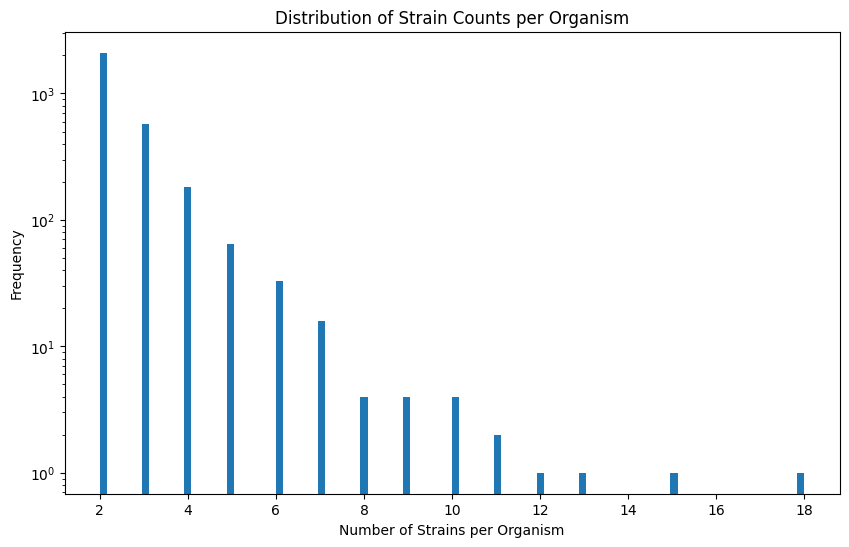

In [6]:
df = df[df['seq'] == ' partial sequence']
print(df.shape)
df["len_seq"] = df["Unnamed: 2"].apply(len)
df = df[(df["len_seq"] >= 1250) & (df["len_seq"] <= 1750)]
df[['accession', 'organism', 'strain']] = df.id.str.extract(r'^(NR_\d+\.\d+)\s+(.+?)\s+strain\s+(.+?)\s+16S ribosomal RNA$')
# keep more than 1 strain per organism
strain_counts = df['organism'].value_counts()
organisms_to_keep = strain_counts[strain_counts > 1].index
df = df[df['organism'].isin(organisms_to_keep)]
print(df.shape)
# print(df.head())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df["len_seq"], bins=100)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sequence Lengths")
plt.show()

# number of strains in organisms with more than 10 strains
strain_counts = df['organism'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(strain_counts, bins=100)
plt.xlabel("Number of Strains per Organism")
plt.ylabel("Frequency")
plt.title("Distribution of Strain Counts per Organism")
plt.yscale('log')
plt.show()

In [7]:
df.to_csv('data/sequence-filtered.tsv')